# Results Analysis - eBay graph

In [86]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [87]:
pal = sns.color_palette("Paired", 12)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10], "pgexplainer": pal[11]}


In [88]:
sns.set_context("notebook", rc={"legend.fontsize":20, "legend.title_fontsize":20, 
                                "axes.titlesize":19,"axes.labelsize":17,
                               "xtick.labelsize" : 16, "ytick.labelsize" : 16})


In [89]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/ebay'

#jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_cc.json'
#ranges = get_param_ranges(jsonpath)

df_res = pd.read_csv(os.path.join(dir, f'ebay_results.csv'), index_col = 0)
res = df_res.groupby(by=['dataset', 'topk', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()
res

,dataset,topk,explainer_name,true_label_as_target,hard_mask,explain_graph,seed,gnn_train_scores__prec,gnn_train_scores__recall,gnn_train_scores__f1-score,...,transformed_edge_mask_infos__topk,fidelity__fidelity_acc+,fidelity__fidelity_acc-,fidelity__fidelity_prob+,fidelity__fidelity_prob-,fidelity__topk,fidelity__fidelity_gnn_acc+,fidelity__fidelity_gnn_acc-,fidelity__fidelity_gnn_prob+,fidelity__fidelity_gnn_prob-
0,ebay_small,1,basic_gnnexplainer,False,False,0.0,0.0,0.492594,0.5,0.496269,...,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.104922
1,ebay_small,1,basic_gnnexplainer,False,True,0.0,0.0,0.492594,0.5,0.496269,...,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.103589
2,ebay_small,1,basic_gnnexplainer,True,False,0.0,0.0,0.492594,0.5,0.496269,...,1.0,0.0,0.0,0.0,0.108888,1.0,NaN,NaN,NaN,NaN
3,ebay_small,1,basic_gnnexplainer,True,True,0.0,0.0,0.492594,0.5,0.496269,...,1.0,0.0,0.0,0.0,0.107525,1.0,NaN,NaN,NaN,NaN
4,ebay_small,1,distance,False,False,0.0,0.0,0.492594,0.5,0.496269,...,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.081897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,ebay_small,100,random,True,True,0.0,0.0,0.492594,0.5,0.496269,...,100.0,0.0,0.0,0.0,0.109262,100.0,NaN,NaN,NaN,NaN
316,ebay_small,100,sa,False,False,0.0,0.0,0.492594,0.5,0.496269,...,100.0,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,0.109262
317,ebay_small,100,sa,False,True,0.0,0.0,0.492594,0.5,0.496269,...,100.0,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,0.109262
318,ebay_small,100,sa,True,False,0.0,0.0,0.492594,0.5,0.496269,...,100.0,0.0,0.0,0.0,0.109262,100.0,NaN,NaN,NaN,NaN


In [90]:
df_res.columns = df_res.columns.str.replace('gnn_train_scores__', 'train_')
df_res.columns = df_res.columns.str.replace('gnn_test_scores__', 'test_')
df_res.columns = df_res.columns.str.replace('fidelity__', '')
df_res.columns = df_res.columns.str.replace('transformed_edge_mask_infos__', '')
df_res.columns = df_res.columns.str.replace('infos__', '')
df_res.columns = df_res.columns.str.replace('initial_edge_mask_infos__', '')
df_res = df_res.reset_index(drop=True)

In [91]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx', 'pgexplainer'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_res['type'] = df_res.apply(lambda row: explainer_type(row), axis=1)

In [92]:
df_res["1-fidelity_acc-"] = 1- df_res["fidelity_acc-"]
df_res["1-fidelity_prob-"] = 1- df_res["fidelity_prob-"]
df_res['charact_prob'] = 2 * df_res['fidelity_prob+'] * (1-df_res['fidelity_prob-'])/ (df_res['fidelity_prob+']  + 1-df_res['fidelity_prob-'])
df_res['charact_acc'] = 2 * df_res['fidelity_acc+'] * (1-df_res['fidelity_acc-'])/ (df_res['fidelity_acc+']  + 1-df_res['fidelity_acc-'])


In [93]:
df_res["1-fidelity_gnn_acc-"] = 1- df_res["fidelity_gnn_acc-"]
df_res["1-fidelity_gnn_prob-"] = 1- df_res["fidelity_gnn_prob-"]
df_res['charact_gnn_prob'] = 2 * df_res['fidelity_gnn_prob+'] * (1-df_res['fidelity_gnn_prob-'])/ (df_res['fidelity_gnn_prob+']  + 1-df_res['fidelity_gnn_prob-'])
df_res['charact_gnn_acc'] = 2 * df_res['fidelity_gnn_acc+'] * (1-df_res['fidelity_gnn_acc-'])/ (df_res['fidelity_gnn_acc+']  + 1-df_res['fidelity_gnn_acc-'])


In [94]:
#df_res = df_res.reset_index(drop=True)
#df_res = df_res[df_res.explainer_name!="pgexplainer"]
df_res

,explain_graph,explainer_name,true_label_as_target,topk_list,hard_mask,seed,topk,train_prec,train_recall,train_f1-score,...,fidelity_gnn_prob-,type,1-fidelity_acc-,1-fidelity_prob-,charact_prob,charact_acc,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,charact_gnn_prob,charact_gnn_acc
0,False,random,True,"1,5,10,15,20,25,50,100",True,0,1,0.492594,0.5,0.496269,...,NaN,baseline,1.0,0.890738,0.0,0.0,NaN,NaN,NaN,NaN
1,False,random,True,"1,5,10,15,20,25,50,100",True,0,5,0.492594,0.5,0.496269,...,NaN,baseline,1.0,0.890738,0.0,0.0,NaN,NaN,NaN,NaN
2,False,random,True,"1,5,10,15,20,25,50,100",True,0,10,0.492594,0.5,0.496269,...,NaN,baseline,1.0,0.890738,0.0,0.0,NaN,NaN,NaN,NaN
3,False,random,True,"1,5,10,15,20,25,50,100",True,0,15,0.492594,0.5,0.496269,...,NaN,baseline,1.0,0.890738,0.0,0.0,NaN,NaN,NaN,NaN
4,False,random,True,"1,5,10,15,20,25,50,100",True,0,20,0.492594,0.5,0.496269,...,NaN,baseline,1.0,0.890738,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,False,pgmexplainer,False,"1,5,10,15,20,25,50,100",False,0,15,0.492594,0.5,0.496269,...,0.021214,pertubation,NaN,NaN,NaN,NaN,1.0,0.978786,0.0,0.0
316,False,pgmexplainer,False,"1,5,10,15,20,25,50,100",False,0,20,0.492594,0.5,0.496269,...,0.021214,pertubation,NaN,NaN,NaN,NaN,1.0,0.978786,0.0,0.0
317,False,pgmexplainer,False,"1,5,10,15,20,25,50,100",False,0,25,0.492594,0.5,0.496269,...,0.021214,pertubation,NaN,NaN,NaN,NaN,1.0,0.978786,0.0,0.0
318,False,pgmexplainer,False,"1,5,10,15,20,25,50,100",False,0,50,0.492594,0.5,0.496269,...,0.021214,pertubation,NaN,NaN,NaN,NaN,1.0,0.978786,0.0,0.0


In [95]:
df_res.loc[df_res['true_label_as_target']==False, 'charact_prob'] = df_res['charact_gnn_prob']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_prob+'] = df_res['fidelity_gnn_prob+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_prob-"] = df_res["1-fidelity_gnn_prob-"]

df_res.loc[df_res['true_label_as_target']==False, 'charact_acc'] = df_res['charact_gnn_acc']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_acc+'] = df_res['fidelity_gnn_acc+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_acc-"] = df_res["1-fidelity_gnn_acc-"]

In [100]:
# Drop duplicate columns
df_res = df_res.T.groupby(level=0).first().T

## GNN scores

In [102]:
df_res[['train_prec', 'train_recall',
       'train_f1-score', 'train_acc', 'test_prec', 'test_recall',
       'test_f1-score', 'test_acc']].drop_duplicates()

,train_prec,train_recall,train_f1-score,train_acc,test_prec,test_recall,test_f1-score,test_acc
0,0.492594,0.5,0.496269,0.985188,0.492684,0.5,0.496315,0.985367


## Performance VS Time

In [49]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})


In [50]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

def mean_str(col):
    if is_numeric_dtype(col):
        return col.mean()
    else:
        return col.unique() if col.nunique() == 1 else np.NaN

In [51]:
df_gen = df_res.groupby(['explainer_name', 'true_label_as_target', 'hard_mask', 'type']).agg(mean_str)#.mean()
df_gen = df_gen.reset_index()
df_gen['hard_mask'] = df_gen['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
df_gen['true_label_as_target'] = df_gen['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})

In [52]:
df_gen

,explainer_name,true_label_as_target,hard_mask,type,explain_graph,topk_list,seed,topk,train_prec,train_recall,...,fidelity_gnn_prob+,fidelity_gnn_prob-,1-fidelity_acc-,1-fidelity_prob-,charact_prob,charact_acc,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,charact_gnn_prob,charact_gnn_acc
0,basic_gnnexplainer,Model,Soft Mask,pertubation,0.0,"1,5,10,15,20,25,50,100",0.0,28.25,0.492594,0.5,...,0.004021,0.073724,1.0,0.926276,0.007997,0.0,1.0,0.926276,0.007997,0.0
1,basic_gnnexplainer,Model,Hard mask,pertubation,0.0,"1,5,10,15,20,25,50,100",0.0,28.25,0.492594,0.5,...,0.018964,0.068641,1.0,0.931359,0.036645,0.0,1.0,0.931359,0.036645,0.0
2,basic_gnnexplainer,Phenomenon,Soft Mask,pertubation,0.0,"1,5,10,15,20,25,50,100",0.0,28.25,0.492594,0.5,...,NaN,NaN,1.0,0.920612,0.001873,0.0,NaN,NaN,NaN,NaN
3,basic_gnnexplainer,Phenomenon,Hard mask,pertubation,0.0,"1,5,10,15,20,25,50,100",0.0,28.25,0.492594,0.5,...,NaN,NaN,1.0,0.927915,0.033794,0.0,NaN,NaN,NaN,NaN
4,distance,Model,Soft Mask,baseline,0.0,"1,5,10,15,20,25,50,100",0.0,28.25,0.492594,0.5,...,0.000000,0.026773,1.0,0.973227,0.000000,0.0,1.0,0.973227,0.000000,0.0
5,distance,Model,Hard mask,baseline,0.0,"1,5,10,15,20,25,50,100",0.0,28.25,0.492594,0.5,...,0.026086,0.020778,1.0,0.979222,0.050179,0.0,1.0,0.979222,0.050179,0.0
6,distance,Phenomenon,Soft Mask,baseline,0.0,"1,5,10,15,20,25,50,100",0.0,28.25,0.492594,0.5,...,NaN,NaN,1.0,0.973227,0.000000,0.0,NaN,NaN,NaN,NaN
7,distance,Phenomenon,Hard mask,baseline,0.0,"1,5,10,15,20,25,50,100",0.0,28.25,0.492594,0.5,...,NaN,NaN,1.0,0.979222,0.050179,0.0,NaN,NaN,NaN,NaN
8,gnnexplainer,Model,Soft Mask,pertubation,0.0,"1,5,10,15,20,25,50,100",0.0,28.25,0.492594,0.5,...,0.002139,0.053257,1.0,0.946743,0.004267,0.0,1.0,0.946743,0.004267,0.0
9,gnnexplainer,Model,Hard mask,pertubation,0.0,"1,5,10,15,20,25,50,100",0.0,28.25,0.492594,0.5,...,0.024654,0.041484,1.0,0.958516,0.047291,0.0,1.0,0.958516,0.047291,0.0


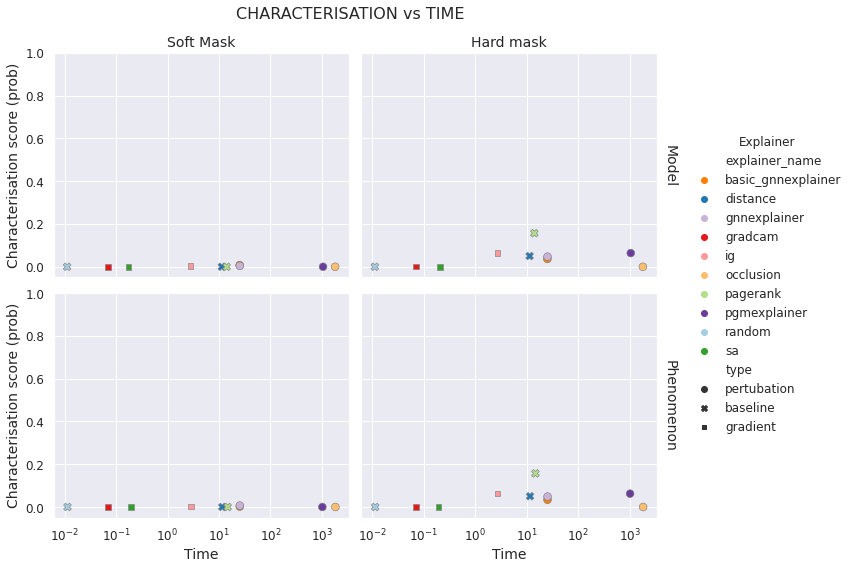

In [53]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="time", y="charact_prob",
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey").set(xscale = 'log')
g.fig.suptitle("CHARACTERISATION vs TIME", fontsize=16, x=0.43)
#g.fig.suptitle("Averaged on all real-world datasets", fontsize=12, x=0.43, y=1)

g.set(ylim=(-0.05,1))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Time", y_var="Characterisation score (prob)")
#g.savefig('/cluster/home/kamara/Explain/figures/topk/charact_vs_time/fig_all_prob_logx.pdf')
#g.savefig('/cluster/home/kamara/Explain/figures/topk/charact_vs_time/fig_all_prob_logx.png')

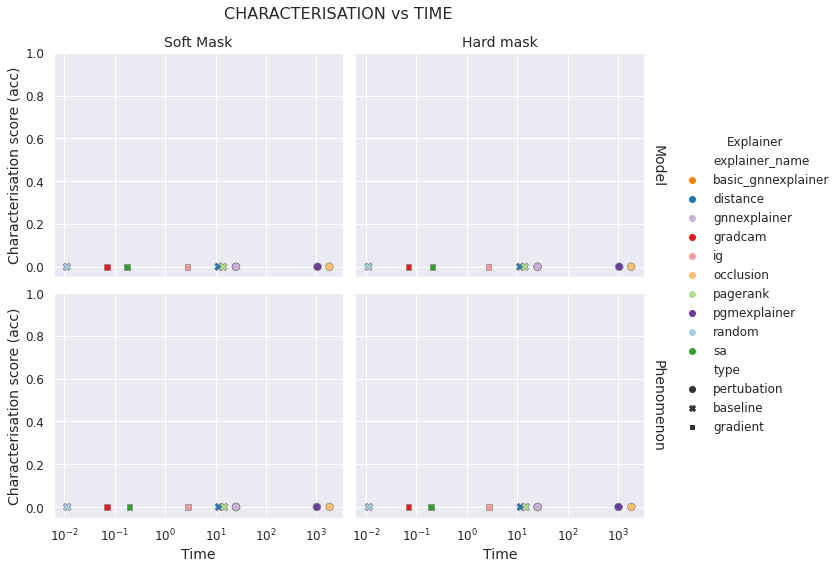

In [54]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="time", y="charact_acc",
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey").set(xscale = 'log')
g.fig.suptitle("CHARACTERISATION vs TIME", fontsize=16, x=0.43)
g.set(ylim=(-0.05,1))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Time", y_var="Characterisation score (acc)")
#g.savefig('/cluster/home/kamara/Explain/figures/topk/charact_vs_time/fig_all_acc.pdf')
#g.savefig('/cluster/home/kamara/Explain/figures/topk/charact_vs_time/fig_all_acc.png')

# Explanation type 
Default topk = 5

In [104]:
df = df_res[df_res['topk']==5]
#df = df_res

## Avg on all datasets

In [105]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})


In [106]:
df_gen = df.groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).agg(mean_str)
df_gen = df_gen.reset_index()
df_gen['hard_mask'] = df_gen['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
df_gen['true_label_as_target'] = df_gen['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})

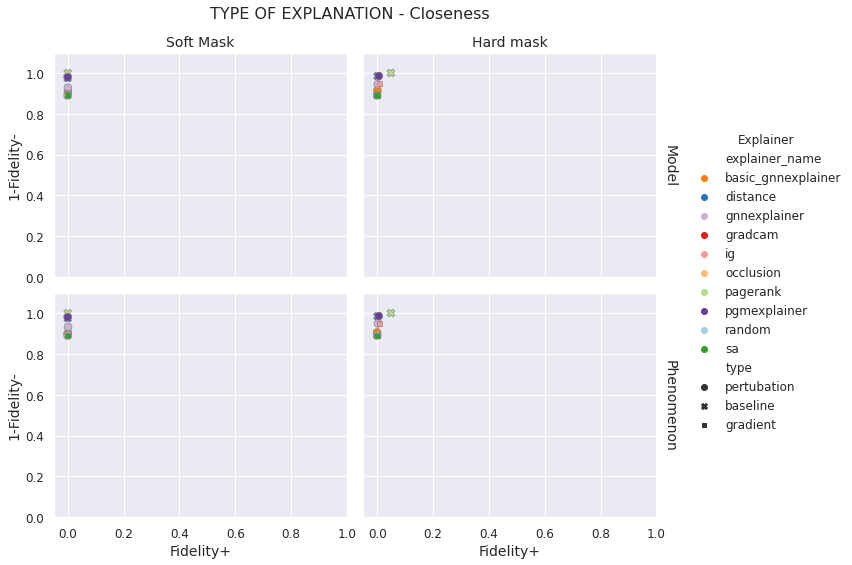

In [107]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="fidelity_prob+", y="1-fidelity_prob-",
    hue="explainer_name", palette=dict_color, style="type", alpha =1, edgecolor="grey", s=60)
g.fig.suptitle("TYPE OF EXPLANATION - Closeness", fontsize=16, x=0.43)
#g.fig.suptitle("Averaged on all real-world datasets", fontsize=12, x=0.43, y=1)

g.set(ylim=(0,1.1))
g.set(xlim=(-0.05,1))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Fidelity+", y_var="1-Fidelity-")
#g.savefig('/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_0.99_all_prob.pdf')
#g.savefig('/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_0.99_all_prob.png')

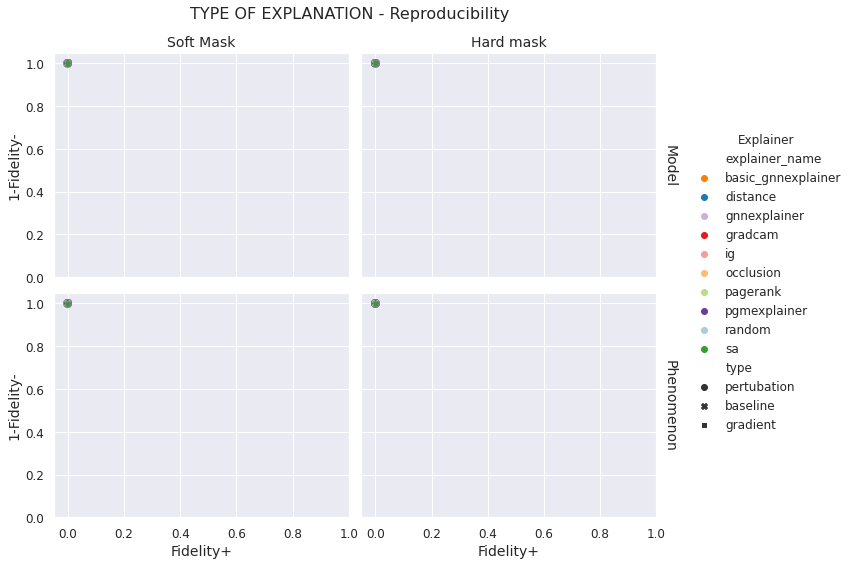

In [109]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="fidelity_acc+", y="1-fidelity_acc-",
    hue="explainer_name", palette=dict_color, style="type", alpha =1, edgecolor="grey", s=60)
g.fig.suptitle("TYPE OF EXPLANATION - Reproducibility", fontsize=16, x=0.43)
g.set(ylim=(0,1.05))
g.set(xlim=(-0.05,1))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Fidelity+", y_var="1-Fidelity-")
#g.savefig('/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_0.99_all_acc.pdf')
#g.savefig('/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_0.99_all_acc.png')

# Consistency - Performance vs Sparsity

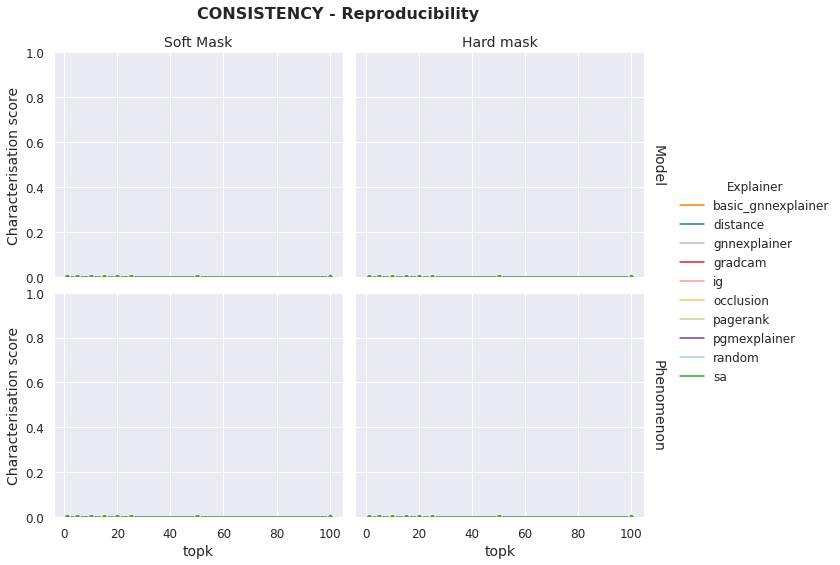

In [110]:
df_gen = df_res.groupby(['explainer_name', 'true_label_as_target', 'hard_mask', 'topk']).agg(mean_str)#.mean()
df_gen = df_gen.reset_index()
df_gen['hard_mask'] = df_gen['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
df_gen['true_label_as_target'] = df_gen['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})

g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.lineplot, x="topk", y="charact_acc",
    hue="explainer_name", palette=dict_color, marker="o")
g.set(ylim=(0,1))
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('CONSISTENCY - Reproducibility', fontsize=16, weight='bold', x=0.43)
g.add_legend(title="Explainer")
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="topk", y_var="Characterisation score")

#g.savefig(f'/cluster/home/kamara/Explain/figures/topk/consistency/fig_consistency_{data}.pdf')
#g.savefig(f'/cluster/home/kamara/Explain/figures/topk/consistency/fig_consistency_{data}.png')


# Mask properties vs Performance 
Sparsity = 0 bc we are interested in the initial masks (without transformation)

In [111]:
df = df_res[df_res['topk']==100]
#df = df_res

In [112]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})


In [117]:
df_mask_data.columns

Index(['1-fidelity_acc-', '1-fidelity_gnn_acc-', '1-fidelity_gnn_prob-',
       '1-fidelity_prob-', 'charact_acc', 'charact_gnn_acc',
       'charact_gnn_prob', 'charact_prob', 'dataset', 'edge_mask_size_init',
       'edge_mask_sparsity_init', 'explain_graph', 'explainer',
       'explainer_name', 'fidelity_acc+', 'fidelity_acc-', 'fidelity_gnn_acc+',
       'fidelity_gnn_acc-', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-',
       'fidelity_prob+', 'fidelity_prob-', 'groundtruth target', 'hard_mask',
       'initial_edge_mask_mask_entropy', 'initial_edge_mask_mask_size',
       'initial_edge_mask_max_avg', 'mask_entropy', 'mask_size', 'max_avg',
       'node_feat_mask_size_init', 'node_feat_mask_sparsity_init', 'num_test',
       'num_test_final', 'number_of_edges', 'seed', 'test_acc',
       'test_f1-score', 'test_prec', 'test_recall', 'time', 'topk',
       'topk_list', 'train_acc', 'train_f1-score', 'train_prec',
       'train_recall', 'true_label_as_target', 'type'],
      dtype='ob

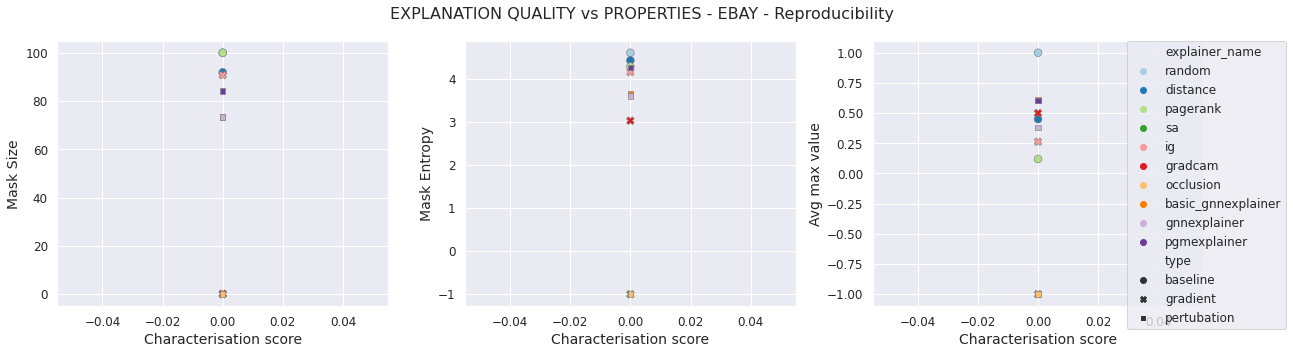

In [120]:
df_mask_data = df[(df['true_label_as_target']==True)&(df['hard_mask']==False)]
fig, axs = plt.subplots(1,3, figsize=(18, 5), sharex=True)

g1 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="mask_size",
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey", ax = axs[0], legend=False)
axs[0].set_ylabel('Mask Size')
axs[0].set_xlabel('Characterisation score')

g2 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="mask_entropy",
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey", ax = axs[1], legend=False)
axs[1].set_ylabel('Mask Entropy')
axs[1].set_xlabel('Characterisation score')

g3 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="max_avg",
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey", ax = axs[2])
axs[2].set_ylabel('Avg max value')
axs[2].set_xlabel('Characterisation score')

# produce a legend with the unique colors from the scatter
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
fig.suptitle('EXPLANATION QUALITY vs PROPERTIES - EBAY - Reproducibility', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()
#fig.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_properties/fig_mask_prop_{data}_prob.pdf')
#fig.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_properties/fig_mask_prop_{data}_prob.png')
